## EDA - Exploratory Data Analysis

Etapa en la que se llevara a cabo un análisis exhaustivo de los datos. Entre los aspectos destacados que se deben abordar en esta etapa se encuentran:

- La busqueda de valores faltantes.
- Tratamiento de valores faltantes.
- Valores atipicos/extremos o outliers.
- Registros duplicados.

#### Importación de librerias:

In [1]:
import pandas as pd
from io import BytesIO
import pyarrow.parquet as pq
import os
import matplotlib.pyplot as plt
import seaborn as sns
import Utilidades as ut

### Business 📊

*Definimos la ruta del archivo :*

In [2]:
ruta = './Datos/Yelp/business.pkl' 

*Almacenamos el contenido del archivo en un DataFrame:*

In [3]:
with open(ruta, "rb") as file:
    df_business = pd.read_pickle(BytesIO(file.read()))

*Visualizamos el DataFrame:*

In [4]:
df_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Visualizamos la información general del DataFrame (nombres de las columnas, valores **non-null** y tipo de dato por columna):*

In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

> *Podemos ver que las columnas del DataFrame estan duplicadas, y podemos ver que esas columnas duplicadas poseen un número muy bajo de valores **non-null**.*

*Procedemos a eliminar esas columnas, ya que no aportan nada relevante:*

In [6]:
df_business = df_business.loc[:, ~df_business.columns.duplicated()]

*Analizamos el porcentaje de valores nulos:*

In [7]:
ut.porcentaje_valores_nulos(df_business)

La columna business_id tiene un  0.00 % de valores nulos
La columna name tiene un  0.00 % de valores nulos
La columna address tiene un  0.00 % de valores nulos
La columna city tiene un  0.00 % de valores nulos
La columna state tiene un  0.00 % de valores nulos
La columna postal_code tiene un  0.00 % de valores nulos
La columna latitude tiene un  0.00 % de valores nulos
La columna longitude tiene un  0.00 % de valores nulos
La columna stars tiene un  0.00 % de valores nulos
La columna review_count tiene un  0.00 % de valores nulos
La columna is_open tiene un  0.00 % de valores nulos
La columna attributes tiene un  9.14 % de valores nulos
La columna categories tiene un  0.07 % de valores nulos
La columna hours tiene un  15.45 % de valores nulos


> *Podemos observar que la gran mayoria de las columnas no poseen valores nulos, y las que si poseen, representan un porcentaje muy bajo.*

*Antes de seguir con el análisis estadistico del DataFrame, guardaremos el archivo en formato **.parquet**, para que al ejecutar operaciones sobre el, sea de manera más optimizada:*

In [8]:
df_business.to_parquet('./Datos/Yelp/business.parquet')

*Abrimos el archivo, pero en formato **.parquet**:*

In [9]:
df_business = pq.read_table('./Datos/Yelp/business.parquet').to_pandas()

*Analizamos las estadisticas descriptivas de todo el DataFrame, y veremos que información relevante podemos obtener a partir de allí:*

In [10]:
df_business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


> *Basándonos en las estadísticas descriptivas de las variables relacionadas con la ubicación, calificación, cantidad de reseñas y estado de apertura de los negocios en el conjunto de datos, podemos concluir que la mayoría de los comercios tienen una calificación promedio de aproximadamente 3.60, la cantidad promedio de reseñas por comercio es de aproximadamente 44.87 y la gran mayoría de los negocios (aproximadamente el 75%) están abiertos, lo que indica una actividad comercial activa.*

*Conteo de ocurrencias en variables categoricas:*

In [11]:
df_business['name'].value_counts().head()

name
Starbucks     724
McDonald's    703
Dunkin'       510
Subway        459
Taco Bell     365
Name: count, dtype: int64

> *Podemos ver que el comercio con mayor cantidad de sucursales es Starbucks. Y en segundo lugar, se encuentra posicionado el comercio de nuestro interes, Mc Donald's, con 703 sucursales.*

In [12]:
df_business['city'].value_counts().head()

city
Philadelphia    14569
Tucson           9250
Tampa            9050
Indianapolis     7540
Nashville        6971
Name: count, dtype: int64

> *Se puede ver que la ciudad con mayor cantidad de comercios es Philadelphia, superando ampliamente la cantidad de comercios en otras ciudades. En segundo y tercer lugar se encuentran, respectivamente, Tucson y Tampa, con una diferencia de 200 locales entre ellos.*

In [13]:
df_business['state'].value_counts().head()

state
PA    34039
FL    26329
TN    12056
IN    11246
MO    10913
Name: count, dtype: int64

> *Superando la cantidad de comercios en otros estados de manera significativa, se encuentran en primer y segundo lugar, Pensilvania y Florida.*

In [14]:
df_business['categories'].value_counts().head()

categories
Beauty & Spas, Nail Salons    1012
Restaurants, Pizza             935
Nail Salons, Beauty & Spas     934
Pizza, Restaurants             823
Restaurants, Mexican           728
Name: count, dtype: int64

> *Viendo a simple vista, podemos observar que la mayor cantidad de comercios son de categoria **Beauty & Spas, Nail Salons**, y en segundo lugar se posiciona la categoria **Restaurants, Pizza**. Si analizaramos detalladamente todas las categorias, podriamos ver que los restaurants, estan categorizados de distintas formas. Asique deberiamos evaluar cual es la categoria que se posiciona en segundo lugar, agrupando de una manera mas conveniente.*

*Analizamos los registros duplicados según **business_id**, ya que deberia haber un unico ID por comercio:*

In [15]:
df_business[df_business.duplicated(subset= ['business_id'])]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


> *Podemos ver que los comercios estan registrados correctamente, ya que no poseen IDs duplicados.*

### *Graficos:*

***Top 5 comercios con mayor cantidad de sucursales:***

In [16]:
business = df_business['name'].value_counts().head()

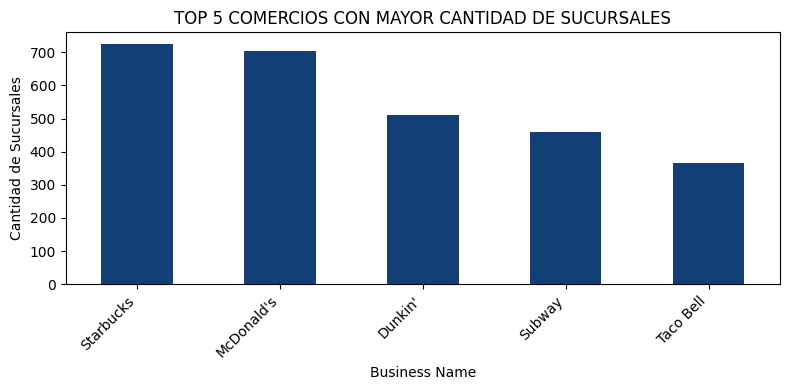

In [17]:
plt.figure(figsize=(8, 4))

business.plot(kind='bar', color='#124076')

plt.title('TOP 5 COMERCIOS CON MAYOR CANTIDAD DE SUCURSALES')

plt.xlabel('Business Name')
plt.ylabel('Cantidad de Sucursales')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

> *Estos cinco comercios representan una proporción significativa del total de negocios en el conjunto de datos. Esto sugiere que hay una concentración de ciertos tipos de negocios en el mercado, lo que puede deberse a la popularidad o demanda de estos servicios entre los consumidores.*

***Cantidad de negocios por calificación:***

In [18]:
star = df_business['stars'].value_counts().sort_index()

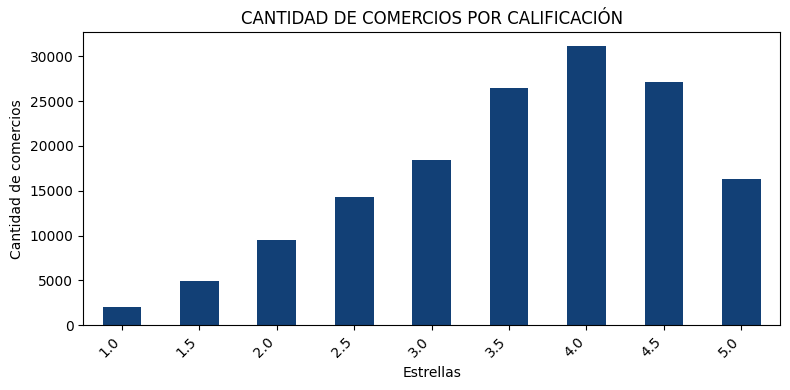

In [19]:
plt.figure(figsize=(8, 4))

star.plot(kind='bar', color='#124076')

plt.title('CANTIDAD DE COMERCIOS POR CALIFICACIÓN')

plt.xlabel('Estrellas')
plt.ylabel('Cantidad de comercios')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

> *La distribución de calificaciones de estrellas entre los comercios muestra que la mayoría de los negocios tienen calificaciones altas, con una cantidad significativa de negocios calificados con 4.0 y 4.5 estrellas. Esto sugiere que los usuarios tienden a calificar positivamente la mayoría de los comercios. Sin embargo, también hay una proporción menor de negocios con calificaciones más bajas, lo que indica que existen experiencias variadas entre los usuarios.*

***Top 5 comercios con mayor cantidad de reseñas:***

*Calculamos la cantidad de reseñas según el nombre del comercio y ordenamos los valores en orden descendente:*

In [20]:
reviews_por_comercio = df_business.groupby('name')['review_count'].sum().sort_values(ascending=False)

*Filtramos, quedandonos con los 5 comercios con mayor cantidad de reseñas:*

In [21]:
top_5_comercios = reviews_por_comercio.head(5)

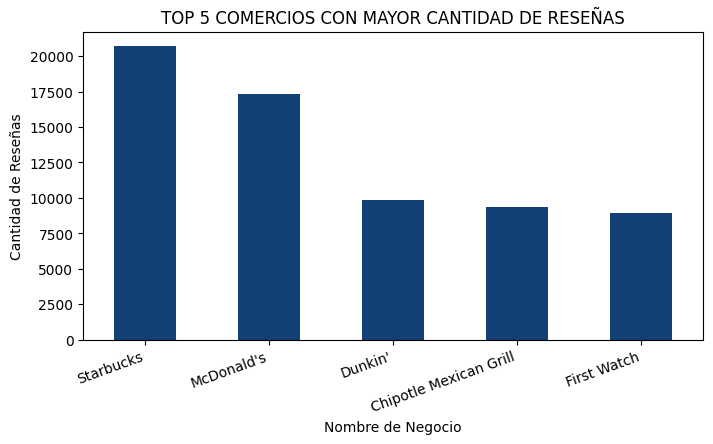

In [22]:
plt.figure(figsize=(8, 4))

top_5_comercios.plot(kind='bar', color='#124076')

plt.title('TOP 5 COMERCIOS CON MAYOR CANTIDAD DE RESEÑAS')

plt.xlabel('Nombre de Negocio')
plt.ylabel('Cantidad de Reseñas')

plt.xticks(rotation=20, ha='right')

plt.show()

> *Los comercios **Starbucks** y **McDonald's**, son los comercios con mayor cantidad de reseñas. Si bien esto podria asociarse a su popularidad y visibilidad en el mercado, también podria estar relacionado a la cantidad de sucursales que tienen cada uno de ellos.*

***Cantidad de comercios por categoria:***

*Generamos un nuevo DataFrame, donde agrupamos los comercios por las categorias más populares:*

In [39]:
df_agrupado = pd.DataFrame(df_business['categories'].apply(ut.agrupar_categorias).value_counts())

In [40]:
df_agrupado

,count
categories,
Otros,79350
Restaurantes,52286
Belleza,15945
Cafeterías,2662
Sin categoría,103


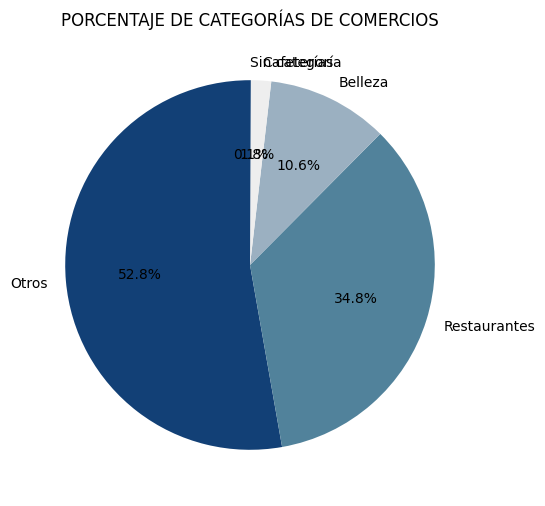

In [47]:
plt.figure(figsize=(6, 6))

plt.pie(df_agrupado['count'], labels=df_agrupado.index, autopct='%1.1f%%', startangle=90, colors= ['#124076', '#51829B', '#9BB0C1', '#EEEEEE'] )

plt.title('PORCENTAJE DE CATEGORÍAS DE COMERCIOS')

plt.show()

> *Si nos hubiéramos guiado únicamente por el conteo de ocurrencias de las categorías, habría sido bastante confuso posicionar las categorías de los comercios. Sin embargo, al agruparlas, podemos ver que la categoría más predominante es "restaurant". Esto sugiere que la mayoría de los comercios en el conjunto de datos están relacionados con la industria de restaurantes, lo que puede ser un indicador importante para comprender la distribución y la naturaleza de los negocios en la muestra.*

***Filtramos el DataFrame, quedandonos con los registros relacionados al comercio de nuestro interes, McDonald's:***

In [66]:
df_business_mc = df_business[df_business['name'].str.contains("McDonald's")]

In [67]:
df_business_mc['categories'].value_counts()

categories
Fast Food, Coffee & Tea, Burgers, Restaurants, Food                            16
Fast Food, Burgers, Coffee & Tea, Restaurants, Food                            12
Fast Food, Restaurants, Burgers, Coffee & Tea, Food                            12
Burgers, Restaurants, Coffee & Tea, Food, Fast Food                            12
Restaurants, Burgers, Fast Food, Food, Coffee & Tea                            11
                                                                               ..
Hot Dogs, Burgers, Food, Coffee & Tea, Fast Food, Restaurants                   1
Food, American (Traditional), Restaurants, Fast Food, Coffee & Tea, Burgers     1
Restaurants, Burgers, Food, Coffee & Tea, Hot Dogs, Fast Food                   1
Restaurants, Fast Food, Breakfast & Brunch, Burgers, Coffee & Tea, Food         1
Coffee & Tea, Food, Burgers, Fast Food, Restaurants, Sandwiches                 1
Name: count, Length: 167, dtype: int64

> *Podemos ver que el mismo comercio, tiene 167 categorias distintas. Si bien todas hacen referencia al mismo tipo de comercio, figuran escritas de distintas formas, con distintas palabras claves o en distinto orden; algo que se debera modificar posteriormente.*

In [68]:
df_business_mc['categories'].str.contains('Restaurants|Restaurant|restaurant|Fast Food|Food').sum()

703

> *Pudimos verificar que filtramos correctamente, corroborando que el comercio correspondiera a la categoria Restaurant, buscando palabras claves.*

### *Análisis exhaustivo del DataFrame filtrado (McDonald's):*

In [71]:
df_business_mc.describe(include='all')


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
count,703,703,703,703,703,703,703.000000,703.000000,703.000000,703.000000,703.000000,702,703,676
unique,703,1,702,263,14,475,NaN,NaN,NaN,NaN,NaN,668,167,159
top,yM8LlTInbQH4FwWC97lz6w,McDonald's,501 Westbank Expy,Indianapolis,PA,89502,NaN,NaN,NaN,NaN,NaN,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Coffee & Tea, Burgers, Restaurants,...","{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
freq,1,703,2,48,170,7,NaN,NaN,NaN,NaN,NaN,7,16,258
mean,NaN,NaN,NaN,NaN,NaN,NaN,37.107962,-88.536985,1.863442,24.692745,0.931721,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6.195158,13.469802,0.522146,18.637708,0.252403,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,27.712884,-119.882540,1.000000,5.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.189378,-90.289183,1.500000,13.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,38.812550,-86.140767,2.000000,20.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,39.954566,-75.600576,2.000000,31.000000,1.000000,NaN,NaN,NaN


> *A partir de este resumen estadistico podemos concluir que hay un total de 703 sucursales de McDonald's, la calificación promedio (stars) de las sucursales es de aproximadamente 1.86, lo que sugiere que la mayoría de las sucursales tienen una baja calificación promedio. La cantidad promedio de reseñas por sucursal es de aproximadamente 24.69, el 93.17% de las sucursales están abiertas, lo que indica que la mayoría de las sucursales en el conjunto de datos están en funcionamiento, la mayoría de las sucursales están ubicadas en el estado de PA (Pennsylvania), la mayoría de las sucursales tienen códigos postales únicos, lo que sugiere que están distribuidas en diferentes ubicaciones.*

*Anteriomente, habiamos visto que el DataFrame con los registros de todos los comercios, no tenian valores nulos, o tenian muy pocos. Pero revisamos nuestro DataFrame filtrado, para ver si esos valores faltantes corresponden a los registros de las sucursales de McDonald's:*

In [72]:
ut.porcentaje_valores_nulos(df_business_mc)

La columna business_id tiene un  0.00 % de valores nulos
La columna name tiene un  0.00 % de valores nulos
La columna address tiene un  0.00 % de valores nulos
La columna city tiene un  0.00 % de valores nulos
La columna state tiene un  0.00 % de valores nulos
La columna postal_code tiene un  0.00 % de valores nulos
La columna latitude tiene un  0.00 % de valores nulos
La columna longitude tiene un  0.00 % de valores nulos
La columna stars tiene un  0.00 % de valores nulos
La columna review_count tiene un  0.00 % de valores nulos
La columna is_open tiene un  0.00 % de valores nulos
La columna attributes tiene un  0.14 % de valores nulos
La columna categories tiene un  0.00 % de valores nulos
La columna hours tiene un  3.84 % de valores nulos


> *La mayor parte de las columnas, no poseen valores nulos. Las columnas que si poseen valores nulos, no representan un problema debido al bajo porcentaje.*

***Distribución de calificaciones por estado:***

*Calculamos el promedio de calificaciones por estado:*

In [92]:
calificacion_por_estado = df_business_mc.groupby('state')['stars'].mean().sort_values(ascending=False)

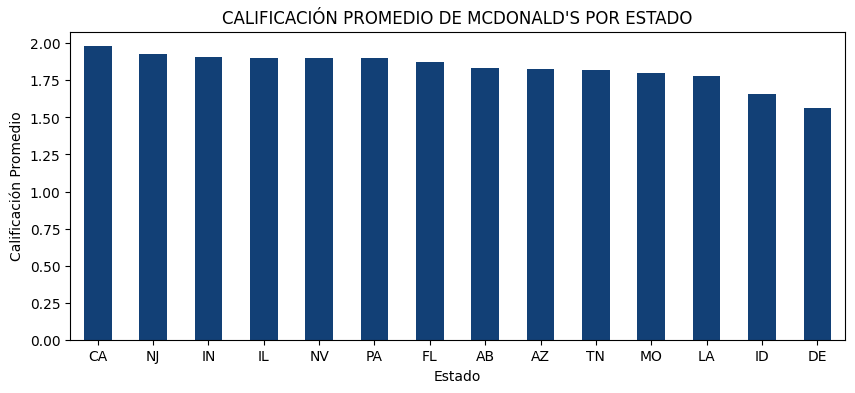

In [103]:
plt.figure(figsize=(10, 4))

calificacion_por_estado.plot(kind='bar', color='#124076')

plt.title('CALIFICACIÓN PROMEDIO DE MCDONALD\'S POR ESTADO')

plt.xlabel('Estado')
plt.ylabel('Calificación Promedio')

plt.xticks(rotation=0)

plt.show()

> *Vemos la distribución de calificaciones por estados. Vemos que en todos los estados la calificacion promedio se encuentra alrededor de las 1.5 y las 2.0 estrellas.*

***Distribución de calificaciones por ciudad:***

In [107]:
calificacion_por_ciudad = df_business_mc.groupby('city')['stars'].mean().sort_values(ascending=False).head(10)

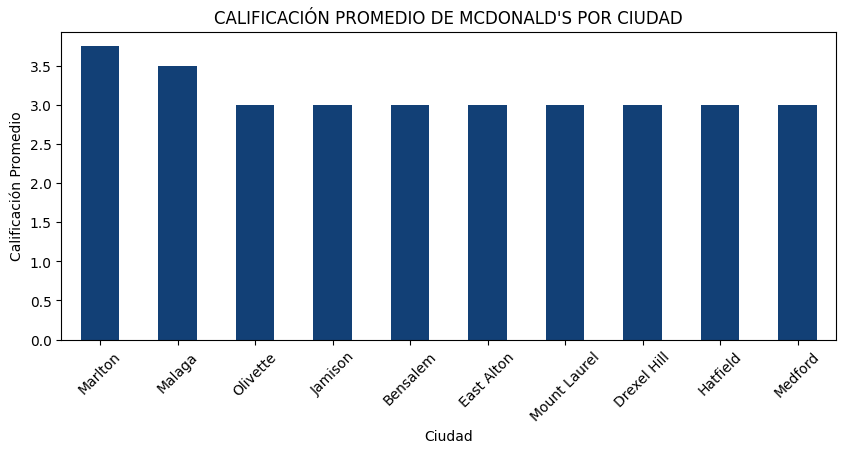

In [108]:
plt.figure(figsize=(10, 4))

calificacion_por_ciudad.plot(kind='bar', color='#124076')

plt.title('CALIFICACIÓN PROMEDIO DE MCDONALD\'S POR CIUDAD')

plt.xlabel('Ciudad')
plt.ylabel('Calificación Promedio')

plt.xticks(rotation=45)

plt.show()

### Checkin 📊

*Definimos la ruta del archivo :*

In [ ]:
ruta = './Datos/Yelp/checkin.json'

*Almacenamos el contenido del archivo en un DataFrame:*

In [ ]:
df_checkin = pd.read_json(ruta, lines=True)

*Visualizamos la estructura del DataFrame:*

In [ ]:
df_checkin.head(2)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."


*Visualizamos la información general del DataFrame (nombres de las columnas, valores **non-null** y tipo de dato por columna):*

In [ ]:
df_checkin.info()

### Tip 📊

*Definimos la ruta del archivo :*

In [ ]:
ruta = './Datos/Yelp/tip.json' 

*Almacenamos el contenido del archivo en un DataFrame:*

In [ ]:
df_tip = pd.read_json(ruta, lines=True)

*Visualizamos la estructura del DataFrame:*

In [ ]:
df_tip.head(2)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0


*Normalizamos los nombres de las columnas:*

In [ ]:
ut.normalizacion_columnas(df_tip)

,User_Id,Business_Id,Text,Date,Compliment_Count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


*El DataFrame generado anteriormente, **mcdonalds**, lo uniremos al DataFrame **df_tip** para quedarnos con los tips del comercio de nuestro interes:*

In [ ]:
tip_mcdonalds = mcdonalds.merge(df_tip, on='Business_Id', how='left')

*Verificamos:*

In [ ]:
tip_mcdonalds.head(2)

,Name,Business_Id,User_Id,Text,Date,Compliment_Count
0,McDonald's,yM8LlTInbQH4FwWC97lz6w,jCLjVfSMbvLkSH2ZMkryZQ,Oatmeal on the go,2011-12-16 13:54:39,0.0
1,McDonald's,yM8LlTInbQH4FwWC97lz6w,6-7HgY0b84ocY9ACESLApA,Awful service.,2015-05-23 17:02:08,0.0


*Eliminaremos la columna **Business_Id**, por que no es relevante, ya que ahora tenemos el nombre del comercio:*

In [ ]:
tip_mcdonalds.drop(columns= 'Business_Id', inplace=True)

*Guardamos el DataFrame resultante para su posterior uso:*

In [ ]:
tip_mcdonalds.to_parquet('./Datos/Archivos Filtrados/tip_mcdonalds.parquet')

### Review 📊

*Definimos la ruta del archivo :*

In [ ]:
ruta = './Datos/Yelp/review.json' 

*Creamos un función que lea el archivo en formato **.json** en fragmentos de 10000 y lo almacene en una lista vacia. Concatenamos los frangmentos de DataFrame en uno solo y guardamos el archivo en formato **.parquet** para que su peso sea menor:*

In [ ]:
# Lista vacia para almacenar los fragmentos del DataFrame
dataframes = []

# Tamaño de los fragmentos
tamano_fragmento = 10000

# Leemos el archivo en fragmentos y creamos DataFrames
with open(ruta, 'r') as file:
    for chunk in pd.read_json(file, lines=True, chunksize=tamano_fragmento):
        dataframes.append(chunk)

# Concatenamos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)

# Guardamos el DataFrame en formato Parquet para que su peso sea menor
df_final.to_parquet('review_temporal.parquet')


*Almacenamos el contenido del archivo en un DataFrame, para su posterior transformación:*

In [ ]:
df_reviews = pd.read_parquet('review_temporal.parquet')

*Visualizamos la estructura del DataFrame:*

In [ ]:
df_reviews.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18


*Normalizamos los nombres de las columnas del DataFrame:*

In [ ]:
ut.normalizacion_columnas(df_reviews)

,Review_Id,User_Id,Business_Id,Stars,Useful,Funny,Cool,Text,Date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


*Uniremos los DataFrames, **mcdonalds** y **df_reviews**, para quedarnos solo con las reseñas del comercio de nuestro interes:*

In [ ]:
reviews_mcdonalds = mcdonalds.merge(df_reviews, on= 'Business_Id', how= 'left')

*Verificamos:*

In [ ]:
reviews_mcdonalds.head(2)

,Name,Business_Id,Review_Id,User_Id,Stars,Useful,Funny,Cool,Text,Date
0,McDonald's,yM8LlTInbQH4FwWC97lz6w,SB8GmxCcWLkz5hnArAWDyg,6z3PRqgD0ZRzo3JWA2XGiQ,1,0,0,0,If you can't come to work with pride and energ...,2018-01-09 21:23:02
1,McDonald's,yM8LlTInbQH4FwWC97lz6w,F99EHFlmHnt3U6wSdM2KoA,bQ_qlqlZRFgfRlqveB-ILg,2,2,2,0,Not the greatest fast food place to hit at nig...,2010-11-24 21:44:42


*Eliminaremos la columna **Business_Id**, por que no es relevante, ya que ahora tenemos el nombre del comercio:*

In [ ]:
reviews_mcdonalds.drop(columns=['Business_Id'], inplace=True)

*Guardamos el DataFrame resultante para su posterior uso:*

In [ ]:
reviews_mcdonalds.to_parquet('./Datos/Archivos Filtrados/reviews_mcdonalds.parquet')

### User 📊

*Definimos la ruta del archivo :*

In [ ]:
ruta = './Datos/Yelp/user.parquet'

*Almacenamos el contenido del archivo en una variable, **df_user**:*

In [ ]:
df_user = pq.read_table(ruta, use_threads=True)

*Lo convertimos a un DataFrame de pandas:*

In [ ]:
df_user = df_user.to_pandas()

*Visualizamos la estructura del DataFrame:*

In [ ]:
df_user.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946


In [ ]:
df_user.columns

Index(['User_Id', 'Name', 'Review_Count', 'Yelping_Since', 'Useful', 'Funny',
       'Cool', 'Elite', 'Friends', 'Fans', 'Average_Stars', 'Compliment_Hot',
       'Compliment_More', 'Compliment_Profile', 'Compliment_Cute',
       'Compliment_List', 'Compliment_Note', 'Compliment_Plain',
       'Compliment_Cool', 'Compliment_Funny', 'Compliment_Writer',
       'Compliment_Photos'],
      dtype='object')

*Normalizamos los nombres de las columnas del DataFrame:*

In [ ]:
ut.normalizacion_columnas(df_user).head(2)

,User_Id,Name,Review_Count,Yelping_Since,Useful,Funny,Cool,Elite,Friends,Fans,...,Compliment_More,Compliment_Profile,Compliment_Cute,Compliment_List,Compliment_Note,Compliment_Plain,Compliment_Cool,Compliment_Funny,Compliment_Writer,Compliment_Photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946


*Guardamos el DataFrame resultante para su posterior uso:*

In [ ]:
reviews_mcdonalds.to_parquet('./Datos/Archivos Filtrados/df_user.parquet')

### Metadatos Sitios 📊

*Definimos la ruta del archivo :*

In [ ]:
ruta = './Datos/Google Maps/metadata-sitios'

*Leemos los archivos **.json** de la carpeta **metadatos-sitios** , los filtramos quedandonos con aquellos registros cuyo **name** contenga **McDonald** en el nombre del comercio y los unimos, conteniendolos en un DataFrame. Convertimos el DataFrame en un archivo compatible con parquet, y lo guardamos de manera local para su posterior uso:*

In [ ]:
#Generamos una lista vacia donde almacenaremos los DataFrames
dfs = []

#Iteramos sobre los archivos del directorio
for filename in os.listdir(ruta):

    #Si el archivo es un JSON, lo leemos y filtramos los registros que contengan la palabra McDonald's
    if filename.endswith('.json'):
        filepath = os.path.join(ruta, filename)
        df = pd.read_json(filepath, lines=True)
        df_filtered = df[df['name'].str.contains(r"\bMcDonald's\b|\bMc Donald's\b", case=False, na=False, regex=True)]
        dfs.append(df_filtered)

#Si se encontraron DataFrames, los concatenamos y guardamos el resultado en formato Parquet
if len(dfs) > 0:
    merged_df = pd.concat(dfs)
    merged_df.reset_index(drop=True, inplace=True)

    # Guardamos el DataFrame en formato Parquet
    merged_df.to_parquet('/Datos/metadatos-sitios-temporal.parquet')
    
else:
    print("No se encontraron archivos JSON en el directorio que cumplieran con la condición.")



*Leemos el archivo generado anteriormente y lo almacenamos en un DataFrame para proceder con las transformaciones del mismo:*

In [ ]:
df_sitios = pd.read_parquet('./Datos/metadatos-sitios-temporal.parquet')

*Normalizamos los nombres de las columnas del mismo:*

In [ ]:
ut.normalizacion_columnas(df_sitios).head(2)

,Name,Address,Gmap_Id,Description,Latitude,Longitude,Category,Avg_Rating,Num_Of_Reviews,Price,Hours,Misc,State,Relative_Results,Url
0,McDonald's,"McDonald's, 1205 S Main St, Manteca, CA 95336",0x80904101ce001281:0x76db23c5d22346ae,"Classic, long-running fast-food chain known fo...",37.785995,-121.218062,Fast food restaurant Breakfast restaurant Coff...,2.4,48,$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x8090410018dc2657:0xed7a807ae3eeee6d, 0x8090...",https://www.google.com/maps/place//data=!4m2!3...
1,McDonald's,"McDonald's, 1000 Palisades Center Dr, West Nya...",0x89c2e9cf8e139235:0x24bfb20e9e09f260,"Classic, long-running fast-food chain known fo...",41.097768,-73.955392,Fast food restaurant Breakfast restaurant Coff...,2.2,18,$,None,{'Accessibility': ['Wheelchair accessible rest...,None,"[0x89c2e9e6ef010ddb:0xe923f7207b70d6f9, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...


*Verificamos los valores unicos en la columna **Name** y podemos ver que hay otros comercios que incluyen el nombre Mc Donald's, pero también hay comercios que son los corrrectos, los de nuestro interes, pero contienen cierta descripción o datos de la ubicación en su nombre, por lo que vamos a buscar la forma de filtrarlos:*

In [ ]:
df_sitios['Name'].unique()

array(["McDonald's", "McDonald's Studio", "McDonald's Lunch",
       "Mc Donald's Towing of Paw Paw", "Mc Donald's",
       "McDonald's OMG Building", "McDonald's Corporate Office.",
       "Norman McDonald's Country Drive-In",
       "McDonald's Warehouse Corporate office", "McDonald's Cafe & BBQ",
       "Mcdonald's Self Storage", "McDonald's Budget Printing",
       "Peninsula McDonald's Office", "Mc Donald's Kennels",
       "Graviss McDonald's Disc Golf Course", "Mcdonald's Playplace",
       "McDonald's Regional Office", "Mc Donald's RV Park & Car Wash",
       "McDonald's Kennel",
       "Martin Brower L.L.C/McDonald's Distribution Center",
       "Mc Donald's on church ave", "McDonald's - Corporate Office",
       "Mcdonald's Play Area", "Mc Donald's Service Station",
       "Bluemound Rd. at McDonald's",
       "Cabin in the Clouds Christmas Forest (Formerly McDonald's Tree Farm)",
       "McDonald's Transmission Repair", "McDonald's / Ross's",
       "McDonald's HVAC", "McDon

*Podemos ver que los elementos contenidos en nuestra columna **Category**, se encuentran en forma de lista. Procederemos a transformarlos para poder realizar las transformaciones necesarias en esa columna:*

In [ ]:
df_sitios['Category'].value_counts()

Category
[Fast food restaurant]                                                                                                                    32
[Corporate office]                                                                                                                        11
[Restaurant]                                                                                                                              10
[Dessert shop]                                                                                                                             5
[Bus stop]                                                                                                                                 2
                                                                                                                                          ..
[Fast food restaurant, Breakfast restaurant, Coffee shop, Hamburger restaurant, Restaurant, Sandwich shop]                                 1
[Fas

*Primero, cambiamos el tipo de dato a **str**:*

In [ ]:
df_sitios['Category'] = df_sitios['Category'].astype(str)

*Luego, recorremos cada elemento de la columna, y eliminamos los corchetes y las comillas simples:*

In [ ]:
df_sitios['Category'] = df_sitios['Category'].apply(lambda x: x.replace('[','').replace(']','').replace('\'',''))

*Verificamos:*

In [ ]:
df_sitios.head(2)

,Name,Address,Gmap_Id,Description,Latitude,Longitude,Category,Avg_Rating,Num_Of_Reviews,Price,Hours,Misc,State,Relative_Results,Url
0,McDonald's,"McDonald's, 1205 S Main St, Manteca, CA 95336",0x80904101ce001281:0x76db23c5d22346ae,"Classic, long-running fast-food chain known fo...",37.785995,-121.218062,Fast food restaurant Breakfast restaurant Coff...,2.4,48,$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x8090410018dc2657:0xed7a807ae3eeee6d, 0x8090...",https://www.google.com/maps/place//data=!4m2!3...
1,McDonald's,"McDonald's, 1000 Palisades Center Dr, West Nya...",0x89c2e9cf8e139235:0x24bfb20e9e09f260,"Classic, long-running fast-food chain known fo...",41.097768,-73.955392,Fast food restaurant Breakfast restaurant Coff...,2.2,18,$,None,{'Accessibility': ['Wheelchair accessible rest...,None,"[0x89c2e9e6ef010ddb:0xe923f7207b70d6f9, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...


*Filtramos el DataFrame, quedandonos con aquellos registros que poseen las palabras "Restaurant", "restaurant", "Fast food" y/o "fast-food" en los elementos de la columna **Category**:*

In [ ]:
df_sitios_ = df_sitios[df_sitios['Category'].str.contains('restaurant|Fast food|Restaurant|fast-food')]

*Guardamos el DataFrame resultante para su posterior uso:*

In [ ]:
df_sitios_.to_parquet('./Datos/Archivos Filtrados/metadatos_mcdonalds.parquet')

*Analizamos aquellos que no contienen ninguno de los juegos de palabras anteriores:*

In [ ]:
df_sitios[~df_sitios['Category'].str.contains('restaurant|Fast food|Restaurant|fast-food')].head(2)

,Name,Address,Gmap_Id,Description,Latitude,Longitude,Category,Avg_Rating,Num_Of_Reviews,Price,Hours,Misc,State,Relative_Results,Url
24,McDonald's Studio,"McDonald's Studio, 141 Bridge Ave E, Delano, M...",0x52b4a9af2ca9aa29:0x20efe9b9990af8b3,None,45.041810,-93.788087,Portrait studio,4.9,8,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x52b4a9105e951a1d:0x1ac4d8fb0264249d, 0x52b4...",https://www.google.com/maps/place//data=!4m2!3...
28,Mc Donald's Towing of Paw Paw,"Mc Donald's Towing of Paw Paw, 39617 W Red Arr...",0x881741d71056f773:0xde1e96ed0a460024,None,42.211307,-85.933143,Towing service Auto wrecker,3.2,8,None,None,None,None,"[0x88176a4b799092ed:0x10fc20d91d5ecfc9, 0x8817...",https://www.google.com/maps/place//data=!4m2!3...


*Podemos ver claramente, que corresponden a otras categorias totalmente distintas y no pertenecen a la cadena de comidas rapidas de nuestro interes.*

### review-Florida 📊

In [ ]:
ruta = './Datos/Google Maps/reviews-estados/review-Florida'

*Leemos los archivos **.json** de la carpeta **review-Florida**. Convertimos el DataFrame en un archivo compatible con parquet, y lo guardamos de manera local para su posterior uso:*

In [ ]:
#Generamos una lista vacia donde almacenaremos los DataFrames
dfs = []

#Iteramos sobre los archivos del directorio
for filename in os.listdir(ruta):

    #Si el archivo es un JSON, lo leemos y lo almacenamos en la lista
    if filename.endswith('.json'):
        filepath = os.path.join(ruta, filename)
        df = pd.read_json(filepath, lines=True)
        dfs.append(df)

#Si se encontraron DataFrames, los concatenamos y guardamos el resultado en formato Parquet
if len(dfs) > 0:
    merged_df = pd.concat(dfs)
    merged_df.reset_index(drop=True, inplace=True)

    #Guardamos el DataFrame en formato Parquet
    merged_df.to_parquet('./Datos/review-Florida-temporal.parquet')
    
else:
    print("No se encontraron archivos JSON en el directorio que cumplieran con la condición.")

*Leemos el archivo generado anteriormente y lo almacenamos en un DataFrame para proceder con las transformaciones del mismo:*

In [ ]:
df_florida = pd.read_parquet('./Datos/review-Florida-temporal.parquet')

*Normalizamos los nombres de las columnas del mismo:*

In [ ]:
df_florida = ut.normalizacion_columnas(df_florida)

In [141]:
df_florida

,User_Id,Name,Time,Rating,Text,Pics,Resp,Gmap_Id
0,1.014719e+20,Julie A. Gerber,1628003250740,1,Update: Their “reply” to my review amounted to...,None,{'text': 'Thank you for the feedback. We would...,0x8893863ea87bd5dd:0x9383ebf973e74abb
1,1.154772e+20,Martin Sheffield,1595031217005,5,He's a knowledgeable doctor but the way he run...,None,{'text': 'Thank you for reaching out. I’m forw...,0x8893863ea87bd5dd:0x9383ebf973e74abb
2,1.018050e+20,Brian Truett,1522924253567,5,"Best doctor I've ever had, I never wait to be ...",None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
3,1.063444e+20,Tina Sun,1467907819586,1,I was told he is a good doctor. I was trying t...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
4,1.008751e+20,James Haynes,1480683415081,5,Takes the time to actually get to know his pat...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
...,...,...,...,...,...,...,...,...
2849995,1.002877e+20,James Rudolph,1617305583696,5,None,None,"{'text': 'Thank you!', 'time': 1617561671234.0}",0x8890966585e36d3f:0x131d47c2c60a8d31
2849996,1.140989e+20,Vincent Alexander,1581817848416,3,None,None,None,0x8890966585e36d3f:0x131d47c2c60a8d31
2849997,1.123448e+20,Brett Owen,1551240010030,5,None,None,None,0x8890966585e36d3f:0x131d47c2c60a8d31
2849998,1.054465e+20,ashly kindle,1521152570004,5,None,None,"{'text': 'Thank you, Ashly', 'time': 151691419...",0x8890966585e36d3f:0x131d47c2c60a8d31


*Uniremos los DataFrames, **df_sitios_** y **df_florida**, para quedarnos solo con las reseñas del comercio de nuestro interes:*

In [142]:
reviews_florida = df_florida.merge(df_sitios, on= 'Gmap_Id')

In [145]:
reviews_florida.head(2)

,User_Id,Name_x,Time,Rating,Text,Pics,Resp,Gmap_Id,Name_y,Address,...,Longitude,Category,Avg_Rating,Num_Of_Reviews,Price,Hours,Misc,State,Relative_Results,Url
0,1.123131e+20,Crystal Pedraza,1609195591445,5,Good food good service,None,None,0x88e81ee8d1ae20e9:0xf34a362c6c772e99,McDonald's,"McDonald's, 13300 Cortez Blvd, Brooksville, FL...",...,-82.506031,Fast food restaurant Breakfast restaurant Coff...,2.2,38,$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x88e81eea3f689d27:0xade1e6e09892161, 0x88e81...",https://www.google.com/maps/place//data=!4m2!3...
1,1.122551e+20,Jessica Guiliano,1572482113768,1,I am here at 8:30 PM and the only thing my dau...,None,None,0x88e81ee8d1ae20e9:0xf34a362c6c772e99,McDonald's,"McDonald's, 13300 Cortez Blvd, Brooksville, FL...",...,-82.506031,Fast food restaurant Breakfast restaurant Coff...,2.2,38,$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x88e81eea3f689d27:0xade1e6e09892161, 0x88e81...",https://www.google.com/maps/place//data=!4m2!3...


*Guardamos el DataFrame resultante para su posterior uso:*

In [154]:
df_sitios_.to_parquet('./Datos/Archivos Filtrados/reviews_florida_mcdonalds.parquet')